In [17]:
import numpy as np
import pandas as pd
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt

tfd = tfp.distributions

## The binomial model

#### Happiness data

Each female of age 65 or over in the 1998 General Social Survey was asked whether or not they were generally happy. Let $$Y_{i} = 1$$ if respondent **i** reported being generally happy, and let $$Y_{i} = 0$$ otherwise.If we lack information distinguishing these **n=129** individuals we may treat responses as being exchangeable. Our joint beliefs about $$Y_{1}, ... , Y_{129}$$ are well approximated by:
- our beliefs about $\theta = \sum_{i=1}^{N} Y_{i}/N$
- the model that, conditional on $\theta$, the $Y_{i}$ are i.i.d. binary random variables with expecatation $\theta$

The last item says that the probability for any potential outcome ${y_{1}, ... , y_{129}}$, conditional on $\theta$, is given by: $$p({y_{1}, ... , y_{129}}|\theta) = \theta^{\sum_{i=1}^{129} y_{i}} (1-\theta)^{129 - \sum_{i=1}^{129} y_{i}$$

##### A uniform prior distribution

The parameter $\theta$ is some unknown number between 0 and 1. Suppose our prior information is such that all subintervals of [0,1] having the same length also have the same probability. Symbolically, $$Pr(a <= \theta <= b) = Pr(a + c <= \theta <= b + c)$$ for $0<=a < b < b + c <= 1$
This condition implies that our density for $\theta$ must be the uniform density: $$p(\theta) = 1$$ for $0 <= \theta <= 1$.

For this prior distribution and the above sampling model, Bayes' rule gives
$$p(\theta | y_{1}, ... , y_{129}) = \frac{p(y_{1}, ... , y_{129}|\theta)p(\theta)}{p(y_{1}, ... , y_{129})} \propto p(y_{1},...,y_{129}|\theta)$$

The last line says that in this particular case $p(\theta|y_{1},...,y_{129})$ and $p(y_{1},...,y_{129}|\theta)$ are proportional to each other as functions of $\theta$. This is because the posterior distribution is equal to $p(y_{1},...,y_{129}|\theta)$ divided by something that does not depend on $\theta$. This means that these two functions of $\theta$ have the same shape, but not necessarily the same scale.

##### Data and posterior distribution

- 129 individuals surveyed;
- 118 individuals report being generally happy (91%);
- 11 individuals report not being generally happy (9%).

The probability of these data for a given value of $\theta$ is $$p(y_{1},...,y_{129}|\theta) = \theta^{118} (1-\theta)^{11}$$

In [18]:
def binomial_likelihood(theta):
    return theta**118 * (1-theta)**11

binomial_distribution_probs = binomial_likelihood(np.linspace(0.0,1.0,200))

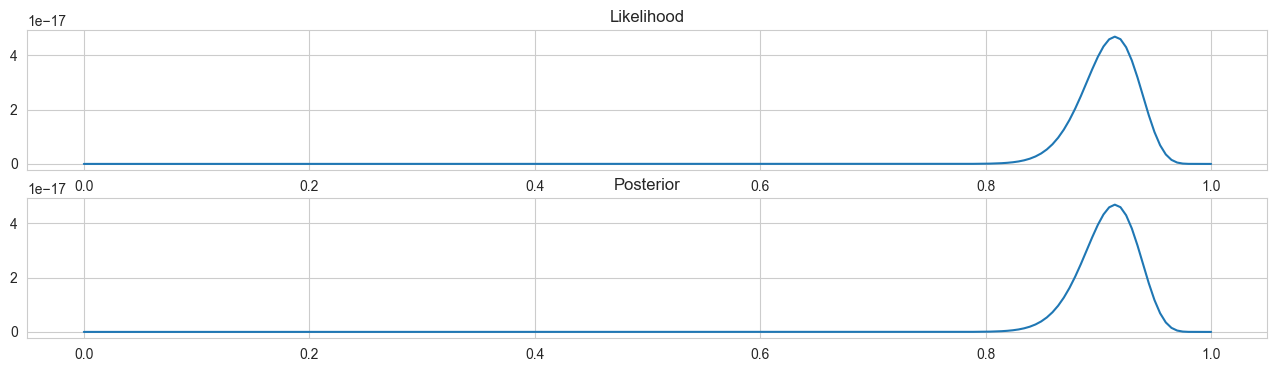

In [25]:
_, binomial_ax = plt.subplots(2, 1, figsize=(16, 4))

sns.lineplot(x=np.linspace(0.0,1.0,200), y=binomial_distribution_probs, ax=binomial_ax[0])
binomial_ax[0].set_title('Likelihood')

sns.lineplot(x=np.linspace(0.0,1.0,200), y=binomial_distribution_probs, ax=binomial_ax[1])
binomial_ax[1].set_title('Posterior')

plt.show()

A plot of this probability as a function of $\theta$ is shown on first plot above. Our result above about proportionality says that the posterior distribution $p(\theta|y_{1},...,y_{129})$ will have the same shape as this function, and so we know that the true value of $\theta$ is very likely to be near 0.91, and almost certainly above 0.80. However, we will often want to be more precise that this, and we will need to know the scale of $p(\theta|y_{1},...,y_{129})$ as well as the shape. From Bayes' rule, we have
$$p(\theta|y_{1},...,y_{129}) = \theta^{118} (1-\theta)^{11} \frac{p(\theta)}{p(y_{1},...,p_{129})} = \theta^{118} (1-\theta)^{11} \frac{1}{p(y_{1},...,y_{129})}$$

It turns out that we can calculate the scale or "normalizing constant" $1/p(y_{1},...,p_{129})$ using the following result from calculus:
$$ \int_{0}^{1} \theta^{a-1}(1-\theta)^{b-1} d\theta = \frac{Gamma(a)Gamma(b)}{Gamma(a+b)}$$

Let's recall what we know about $p(y_{1},...,y_{129})$:
- $\int_{0}^{1} p(\theta | y_{1},...,y_{129}) d\theta = 1$
- $p(\theta | y_{1},...,y_{129}) = \frac{\theta^{118} (1-\theta)^{11}}{p(y_{1},...,y_{129})}$, from Bayes' rule.

Therefore,

$$ 1 = \int_{0}^{1}p(\theta | y_{1},...,y_{129}) d\theta$$
$$ 1 = \int_{0}^{1} \frac{\theta^{118} (1-\theta)^{11}}{p(y_{1},...,p_{129})} d\theta$$
$$ 1 = \frac{1}{p(y_{1},...,y_{129})} \int_{0}^{1} \theta^{118} (1-\theta)^{11} d\theta$$
$$ 1 = \frac{1}{p(y_{1},...,y_{129})} \frac{Gamma(119)Gamma(12)}{Gamma(131)}$$
and using the calculus result, and so
$$ p(y_{1},...,y_{129}) = \frac{Gamma(119)Gamma(12)}{Gamma(131)}$$

Putting everything together, we have

$$ p(\theta|y_{1},...,y_{129}) = \frac{Gamma(119)Gamma(12)}{Gamma(131)} \theta^{119 - 1}(1-\theta)^{12-1}$$

This density for $\theta$ is called a **beta distribution** with parameters a=119 and b=12.

##### The beta distribution

An uncertain quantity $\theta$, known to be between 0 and 1, has a **beta(a,b)** distribution if

$$ p(\theta) = beta(\theta, a, b) = \frac{Gamma(a+b)}{Gamma(a)Gamma(b)} \theta^{a-1}(1-\theta)^{b-1}$$

For such a random variable,

In [26]:
def beta_distribution(a_, b_):
    return tfd.Beta(a_, b_)

In [35]:
happiness_beta_distribution = beta_distribution(119, 12)

mode_happiness = happiness_beta_distribution.mode()
mean_happiness = happiness_beta_distribution.mean()
std_happiness = happiness_beta_distribution.stddev()

print(f"mode={mode_happiness}")
print(f"mean={mean_happiness}")
print(f"std={std_happiness}")

mode=0.9147287011146545
mean=0.9083969593048096
std=0.02510763891041279


##### The binomial distribution

A random variable $ Y \in {0,1,...,n} $ has a $binomial(n,\theta)$ distribution if
$$ Pr(Y= y| \theta) = binom(y, n, \theta) = \binom{n}{y} \theta^{y}(1-\theta)^{n-y} $$ for $$y \in {0, 1, ..., n}$$

Binomial distributions with different values of $n$ and $\theta$ are shown below. For a binomial(n, $\theta$) distribution random variable,

$$E[Y|\theta] = n\theta$$
$$Var[Y|\theta] = n\theta(1-\theta)$$

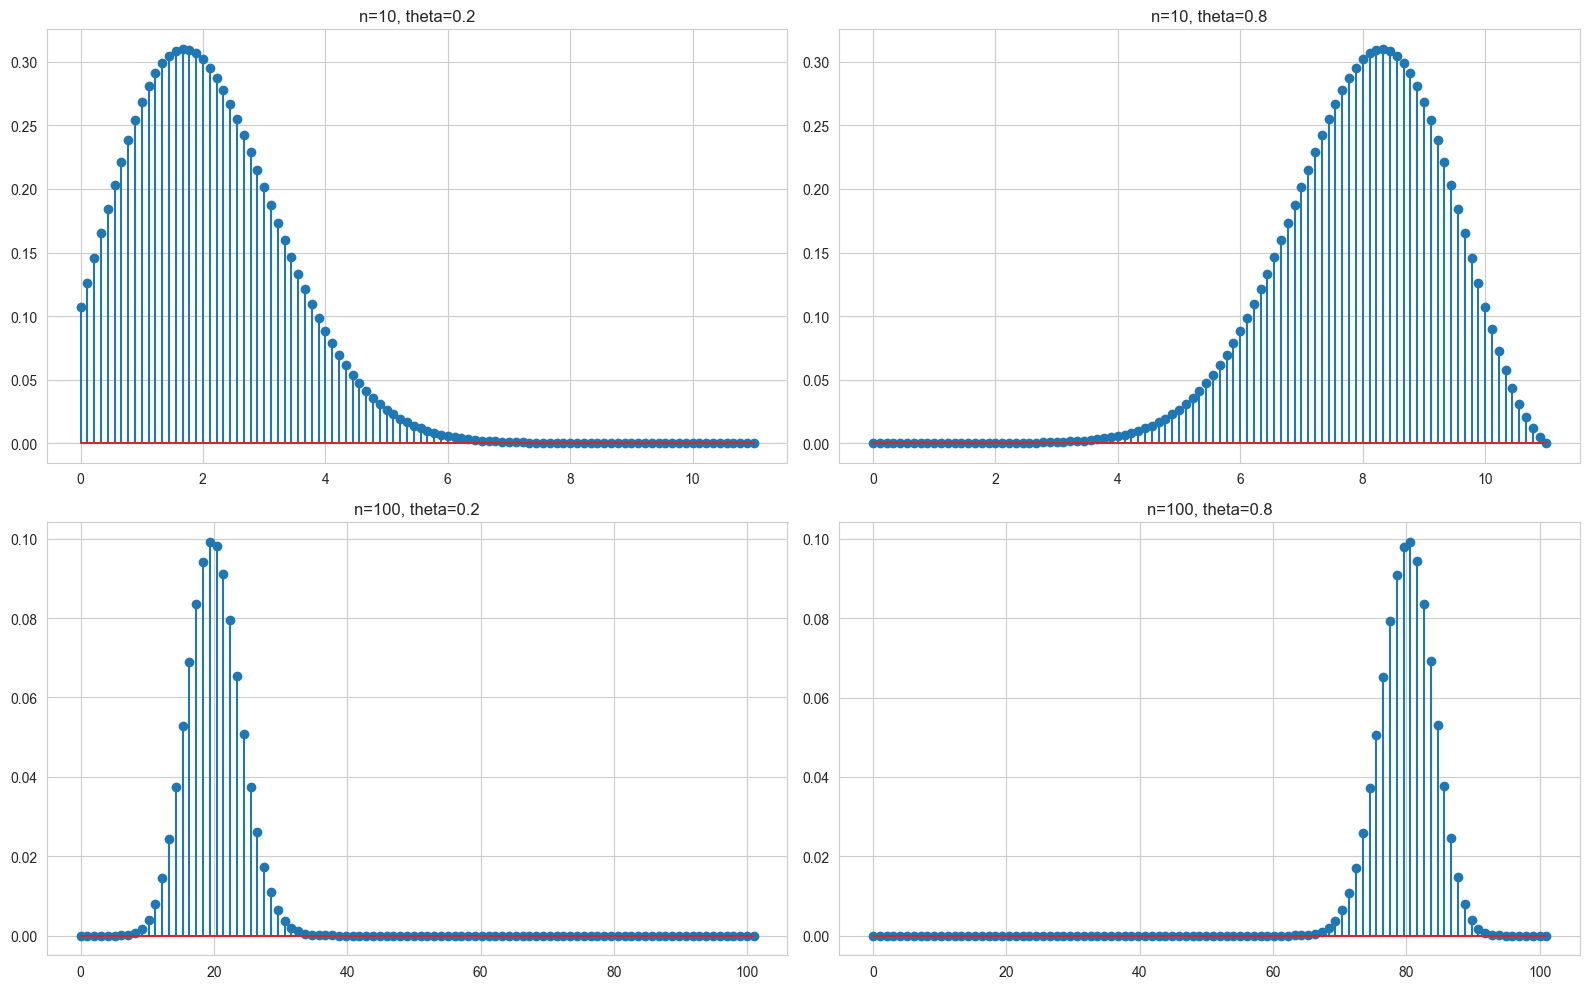

In [85]:
def binomial_distribution(n_, theta_):
    return tfd.Binomial(total_count=n_, probs=theta_)

_, binomial_ax = plt.subplots(2, 2, figsize=(16, 10))

binomial_ex_1 = binomial_distribution(10, 0.2)
binomial_ex_2 = binomial_distribution(10, 0.8)

binomial_ex_3 = binomial_distribution(100, 0.2)
binomial_ex_4 = binomial_distribution(100, 0.8)

binomial_ex_1_probs = binomial_ex_1.prob(np.linspace(0, 11, 100))
binomial_ex_2_probs = binomial_ex_2.prob(np.linspace(0, 11, 100))

binomial_ex_3_probs = binomial_ex_3.prob(np.linspace(0, 101, 100))
binomial_ex_4_probs = binomial_ex_4.prob(np.linspace(0, 101, 100))

binomial_ax[0][0].stem(np.linspace(0, 11, 100), binomial_ex_1_probs)
binomial_ax[0][0].set_title("n=10, theta=0.2")

binomial_ax[0][1].stem(np.linspace(0, 11, 100), binomial_ex_2_probs)
binomial_ax[0][1].set_title("n=10, theta=0.8")

binomial_ax[1][0].stem(np.linspace(0, 101, 100), binomial_ex_3_probs)
binomial_ax[1][0].set_title("n=100, theta=0.2")

binomial_ax[1][1].stem(np.linspace(0, 101, 100), binomial_ex_4_probs)
binomial_ax[1][1].set_title("n=100, theta=0.8")

plt.tight_layout()
plt.show()

##### Posterior inference under a uniform prior distribution

Having observed $Y=y$ our task is to obtain the posterior distribution of $\theta$:

$$ p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)} = \frac{\binom{n}{y}\theta^{y}(1-\theta)^{n-y}p(\theta)}{p(y)}=c(y)\theta^{y}(1-\theta)^{n-y}p(\theta)$$ where c(y) is a function of y and not of $\theta$. For the uniform distribution with $p(\theta) = 1$ we can find out what c(y) is using our calculus trick:

$$ 1 = \int_{0}^{1}c(y)\theta^{y}(1-\theta)^{n-y} d\theta$$
$$ 1 = c(y) \int_{0}^{1}\theta^{y}(1-\theta)^{n-y} d\theta$$
$$ 1 = c(y) \frac{Gamma(y+1)Gamma(n-y+1)}{Gamma(n+2)}$$

The normalizing constant c(y) is therefore equal to $\frac{Gamma(n+2)}{Gamma(y+1)Gamma(n-y+1)}$ and we have

$$ p(\theta|y) = \frac{Gamma(n+2)}{Gamma(y+1)Gamma(n-y+1)}\theta^{y}(1-\theta)^{n-y}=\frac{Gamma(n+2)}{Gamma(y+1)Gamma(n-y+1)}\theta^{(y+1) - 1}(1-\theta)^{(n-y + 1) - 1} = beta(y+1, n-y+1)$$

Recall the happiness example, where we observed that $Y \equiv \sum Y_{i} = 118$

$$ n = 129, Y \equiv \sum Y_{i} = 118 \Rightarrow \theta | {Y=118} \sim beta(119, 12)$$

In other words, the information contained in ${Y_{1}=y_{1}, ... , Y_{n} = y_{n}}$ is the same as the information contained in ${Y=y}$, where $Y = \sum Y_{i}$ and $y = \sum y_{i}$.


##### Posterior distributions under beta prior distributions

The uniform prior distribution has $p(\theta) = 1$ for all $\theta \in [0, 1]$. This distribution can be though of as a beta prior distribution with parameters $a=1$ and $b=1$:

$$ p(\theta) = \frac{Gamma(2)}{Gamma(1)Gamma(1)} \theta^(1-1)(1-\theta)^(1-1) = \frac{1}{1} \theta^0(1-\theta)^0 = 1$$

In the previous section, we saw that

if $
\begin{Bmatrix}
\theta \sim beta(1,1) \\ Y \sim binomial(n, \theta)
\end{Bmatrix}
$, then $ {\theta | Y = y} \sim beta(y+1, n-y+1)$,

and so to get the posterior distribution when our prior distribution is $beta(a=1, b=1)$, we can imply add the number of 1's to the **a** parameter and the number of 0's to the **b** parameter. Does this result hold for arbitrary beta priors? Let's find out: Suppose $\theta \sim beta(a, b)$ and $Y \sim binomial(n, \theta)$. Having observed $Y=y$,

$$ p(\theta | y) = \frac{p(\theta)p(y|\theta)}{p(y)} = \frac{1}{p(y)} \frac{Gamma(a+b)}{Gamma(a)Gamma(b)}\theta^{a-1}(1-\theta)^{b-1} \binom{n}{y} \theta^{y}(1-\theta)^{n-y} = c(n, y, a, b) \theta^{a+y-1} (1-\theta)^{b+n-y+1} = beta(\theta, a+y, b + n - y)$$

##### Binomial sampling and uniform prior

Suppose out of $n=10$ conditionally independent draws of a binary random variable, we observe $Y=2$ ones. Using a uniform prior distribution for $\theta$, the posterior distribution is $\theta | {Y=2} \sim beta(1+2, 1+8)$. A 95% posterior confidence interval can be obtained from the .025 and .975 quantiles of this beta distribution.

In [95]:
a_, b_, n_, y_ = 1, 1, 10, 2
np.quantile(beta_distribution(a_ + y_, b_ + n_ - y_).sample(5000), [0.025, 0.975])

array([0.06084739, 0.51694534])

So the posterior probability that $\theta$ is in 95% CI.

## The Poisson model

Some measurements, such as a person's number of children or number of friends, have values that are whole numbers. In these cases our sample space is $Y = {0, 1, 2, ...}$. Perhaps the simplest probability model on $Y$ is the Poisson model.


#### Poisson distribution

Random variable Y has a Poisson distribution with mean $\theta$ if

$$ Pr(Y= y| \theta) = dpois(y, \theta) = \frac{\theta^{y}e^{-\theta}}{y!}$$ for $y \in {0, 1, 2, ...}$

For such a random variable,

- $E[Y|\theta] = \theta$
- $Var[Y|\theta] = \theta$

People sometimes say that the Poisson family of distributions has a "mean-variance relationship" because if one Poisson distribution has a larger mean than another, it will have a larger variance as well.

#### Posterior inference

If we model $Y_{1}, ... , Y_{n}$ as i.i.d. Poisson with mean $\theta$, then the joint pdf of our sample data is as follows:

$$ Pr(Y_{1}=y_{1}, ..., Y_{n}=y_{n}|\theta) = \prod_{i=1}^{n} p(y_{i}|\theta) = \prod_{i=1}^{n} \frac{\theta^{y_{i}}e^{-\theta}}{y_{i}!} = c(y_{1}, ... ,y_{n}) \theta^{\sum y_{i}}e^{-n\theta}$$

Comparing two values of $\theta$ a posteriori, we have

$$ \frac{p(\theta_{a}|y_{1},...,y_{n})}{p(\theta_{b}|y_{1},...,y_{n})} = \frac{e^{-n\theta_{a}}}{e^{-n\theta_{b}}} \frac{\theta_{a}^{\sum y_{i}}}{\theta_{b}^{\sum y_{i}}} \frac{p(\theta_{a})}{p(\theta_{b})} $$

As in the case of the i.i.d. binary model $\sum_{i=1}^{n} Y_{i}$ contains all the information about $\theta$ that is available in the data, and again we say that $\sum_{i=1}^{n} Y_{i}$ is a sufficient statistic. Furthermore, ${\sum_{i=1}^{n}Y_{i}|\theta} \sim Poisson(n\theta)$

#### Gamma distribution

An uncertain positive quantity $\theta$ has a gamma(a,b) distribution if

$$ p(\theta) = gamma(\theta, a, b) = \frac{b^{a}}{\Gamma(a)} \theta^{a-1}e^{-b\theta}$$ for $\theta, a, b > 0$

For such a random variable,
- $E[\theta] = a/b$
- $Var[\theta] = a/b^{2}$
- $mode[\theta] =
\begin{cases}
(a-1)/b & \text{ if } a>1 \\
0 & \text{ if } a<= 1
\end{cases}$

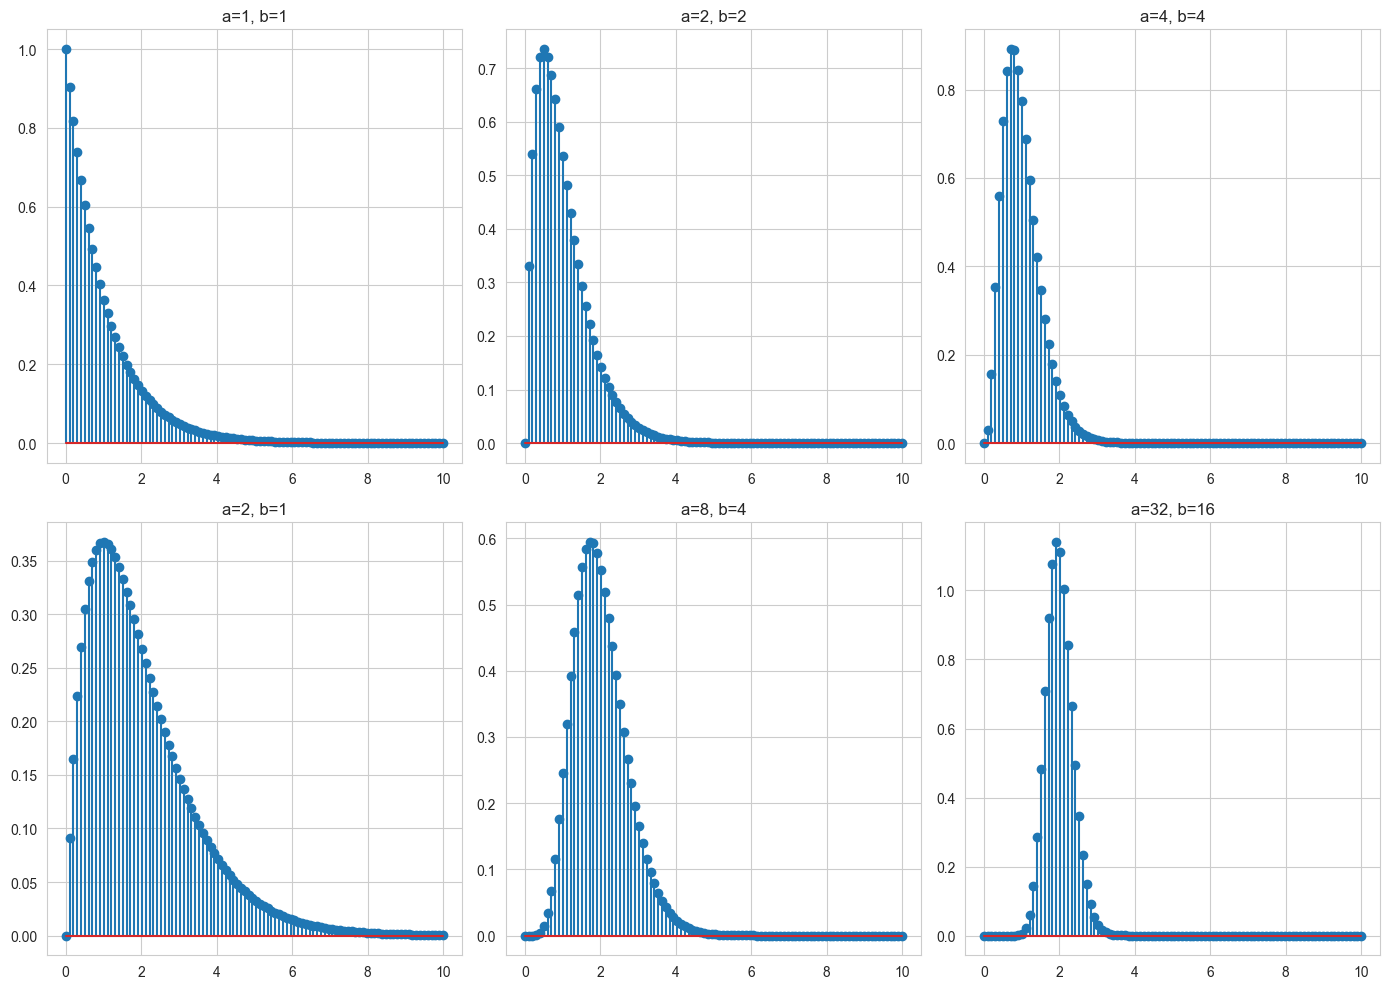

In [103]:
def gamma_distribution(a, b):
    return tfd.Gamma(concentration=a, rate=b)

gamma_ex_1 = gamma_distribution(1, 1)
gamma_ex_2 = gamma_distribution(2, 2)
gamma_ex_3 = gamma_distribution(4, 4)

gamma_ex_4 = gamma_distribution(2, 1)
gamma_ex_5 = gamma_distribution(8, 4)
gamma_ex_6 = gamma_distribution(32, 16)

gamma_x_vals = np.linspace(0, 10, 100)
gamma_ex_1_probs = gamma_ex_1.prob(gamma_x_vals)
gamma_ex_2_probs = gamma_ex_2.prob(gamma_x_vals)
gamma_ex_3_probs = gamma_ex_3.prob(gamma_x_vals)
gamma_ex_4_probs = gamma_ex_4.prob(gamma_x_vals)
gamma_ex_5_probs = gamma_ex_5.prob(gamma_x_vals)
gamma_ex_6_probs = gamma_ex_6.prob(gamma_x_vals)

_, gamma_ax = plt.subplots(2, 3, figsize=(14, 10))

gamma_ax[0][0].stem(gamma_x_vals, gamma_ex_1_probs)
gamma_ax[0][0].set_title('a=1, b=1')

gamma_ax[0][1].stem(gamma_x_vals, gamma_ex_2_probs)
gamma_ax[0][1].set_title('a=2, b=2')

gamma_ax[0][2].stem(gamma_x_vals, gamma_ex_3_probs)
gamma_ax[0][2].set_title('a=4, b=4')

gamma_ax[1][0].stem(gamma_x_vals, gamma_ex_4_probs)
gamma_ax[1][0].set_title('a=2, b=1')

gamma_ax[1][1].stem(gamma_x_vals, gamma_ex_5_probs)
gamma_ax[1][1].set_title('a=8, b=4')

gamma_ax[1][2].stem(gamma_x_vals, gamma_ex_6_probs)
gamma_ax[1][2].set_title('a=32, b=16')

plt.tight_layout()
plt.show()

##### Posterior distribution of $\theta$

Suppose $Y_{1}, ..., Y_{n} | \theta \sim i.i.d. Poisson(\theta)$ and $p(\theta) = gamma(\theta, a, b)$. Then
$$ p(\theta | y_{1}, ..., y_{n}) = p(\theta) \frac{p(y_{1},...,y_{n}|\theta)}{p(y_{1},...,y_{n})} = {\theta^{a-1}e^{-b\theta}} {\theta^{\sum y_{i}}e^{-n\theta}} c(y_{1},...,y_{n},a,b) = \theta^{a + \sum y_{i}-1} e^{-(b+n)\theta} c(y_{1},...,y_{n},a,b)$$

This is evidently a gamma distribution, and we have confirmed the conjugacy of the gamma family for the Poisson sampling model:

$$
\left.\begin{matrix}
\theta \sim gamma(a, b)\\Y_{1}, ..., Y_{n} | \theta \sim i.i.d. Poisson(\theta)
\end{matrix}\right\}
\Rightarrow
{\theta | Y_{1},...,Y_{n}} \sim gamma(a + \sum y_{i}, b + n)
$$

##### Example: Birth rates

Over the course of the 1990s the General Social Survey gathered data on the educational attainment and number of children of 155 women who were 40 years of age at the time of their participation in the survey. These women were in their 20s during the 1970s, a period of historically low fertility rates in the US. In this example we will compare the women with college degrees to those without in terms of their numbers of children.
Let $Y_{1,1},...,Y_{n_{1}, 1}$ denote the numbers of children for the $n_{1}$ women without college degrees and $Y_{1,2},...,Y_{n_{2}, 2}$ be the data for women with degrees. For this example, we will use the following sampling models:

$$ Y_{1,1},...,Y_{n_{1}, 1} | \theta_{1} \sim i.i.d. Poisson(\theta_{1})$$
$$ Y_{1,2},...,Y_{n_{2}, 2} | \theta_{2} \sim i.i.d. Poisson(\theta_{2})$$

The appropriateness of the Poisson model for these data will be examined in the next chapter. Empirical distributions for the data are displayed in charts below, and group sums and means are as follows:

In [112]:
def poisson_distribution(theta):
    return tfd.Poisson(rate=theta)

number_children_wo_degree = poisson_distribution(1.95)
number_children_w_degree = poisson_distribution(1.50)

x1_vals, x2_vals = np.arange(0, 7), np.arange(0, 5)
x1_probs, x2_probs = number_children_wo_degree.prob(x1_vals), number_children_w_degree.prob(x2_vals)

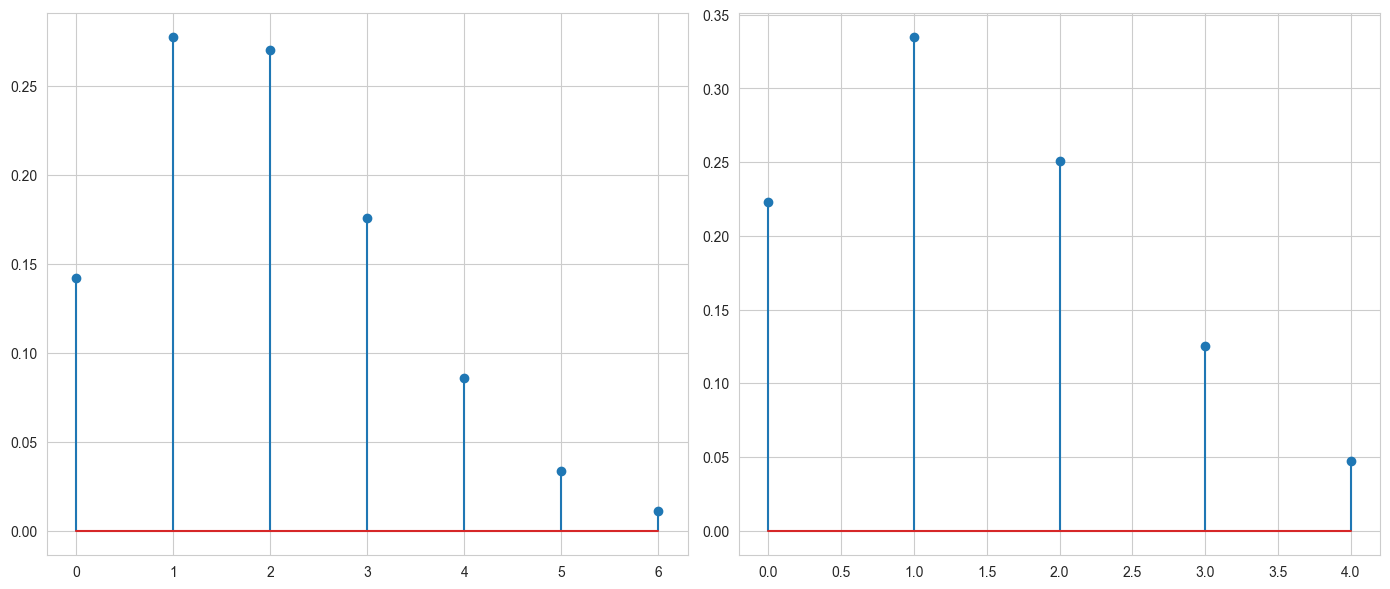

In [113]:
_, num_ch_ax = plt.subplots(1, 2, figsize=(14, 6))

num_ch_ax[0].stem(x1_vals, x1_probs)
num_ch_ax[1].stem(x2_vals, x2_probs)

plt.tight_layout()
plt.show()

Less than bachelor's: $n_{1} = 111, \sum_{i=1}^{n_{1}} Y_{i,1} = 217, mean of Y_{1} = 1.95$
Bachelor's or higher: $n_{2} = 44, \sum_{i=1}^{n_{2}} Y_{i,2} = 66, mean of Y_{2} = 1.50$

In the case where ${\theta_{1}, \theta_{2}} \sim i.i.d. gamma(a=2, b=1)$ we have the following posterior distributions:

$$\theta_{1} | {{n_{1}=111, \sum Y_{i,1}} \sim gamma(2 + 217, 1 + 111) = gamma(219, 112)$$
$$\theta_{2} | {{n_{1}=44, \sum Y_{i,2}} \sim gamma(2 + 66, 1 + 44) = gamma(68, 45)$$

Posterior means, modes and 95% quantile-based CI for $\theta_{1}$ and $\theta_{2}$ can be obtained from their gamma posterior distributions:


In [123]:
a_, b_, n1_, n2_ = 2, 1, 111, 44
first_group_size, second_group_size = 217, 66
first_group_size_att, second_group_size_att = 111, 44

women_wo_degree_posterior = gamma_distribution(a_ + first_group_size, b_ + first_group_size_att)
women_w_degree_posterior = gamma_distribution(a_ + second_group_size, b_ + second_group_size_att)

print(f"mean[theta1] = {women_wo_degree_posterior.mean()}")
print(f"mode[theta1] = {women_wo_degree_posterior.mode()}")
print(f"95% CI [theta1]={np.quantile(women_wo_degree_posterior.sample(2000), [0.025, 0.975])}")

print("=======================================")
print(f"mean[theta2]={women_w_degree_posterior.mean()}")
print(f"mode[theta2]={women_w_degree_posterior.mode()}")
print(f"95% CI [theta2]={np.quantile(women_w_degree_posterior.sample(2000), [0.025, 0.975])}")

mean[theta1] = 1.9553570747375488
mode[theta1] = 1.9464284181594849
95% CI [theta1]=[1.70429918 2.23542963]
mean[theta2]=1.5111110210418701
mode[theta2]=1.4888887405395508
95% CI [theta2]=[1.17501109 1.88927063]


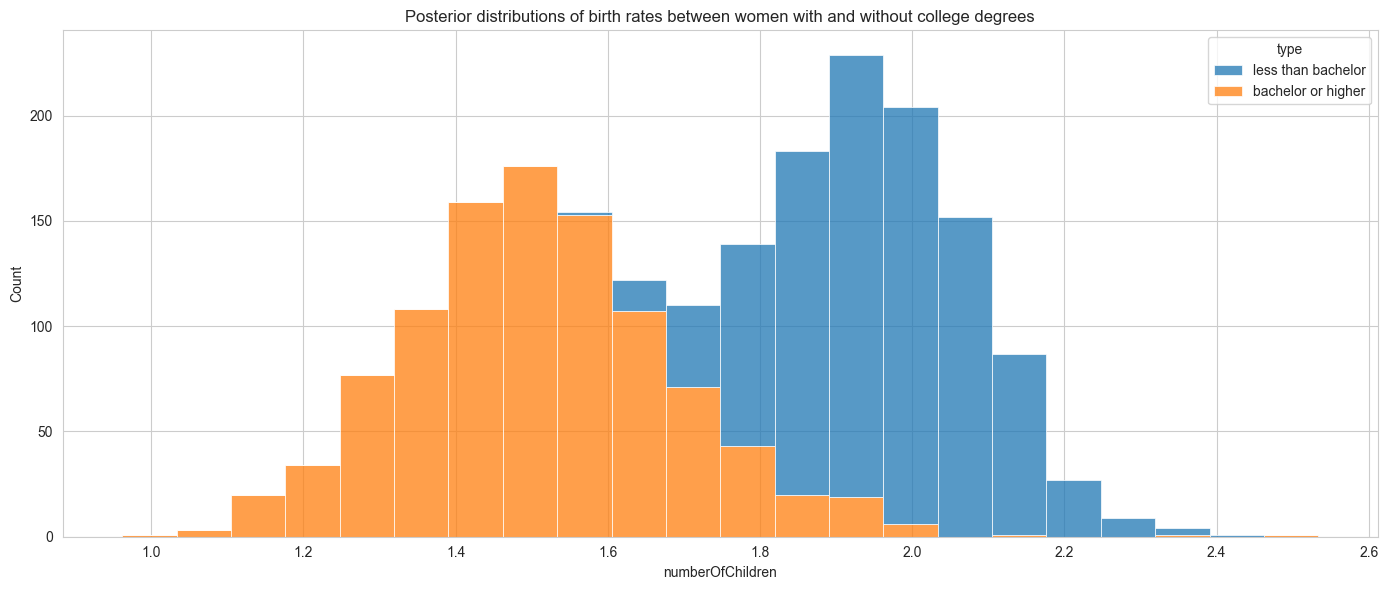

In [153]:
women_wo_degree_posterior_samples = women_wo_degree_posterior.sample(1000)
women_w_degree_posterior_samples = women_w_degree_posterior.sample(1000)


women_wo_degree_sample_df = pd.DataFrame(women_wo_degree_posterior_samples, columns=["numberOfChildren"])
women_wo_degree_sample_df["type"] = "less than bachelor"

women_w_degree_sample_df = pd.DataFrame(women_w_degree_posterior_samples, columns=["numberOfChildren"])
women_w_degree_sample_df["type"] = "bachelor or higher"

birth_df = pd.concat([women_wo_degree_sample_df, women_w_degree_sample_df]).reset_index(drop=True)

_, birth_ax = plt.subplots(1, 1, figsize=(14, 6))

sns.histplot(
    data=birth_df,
    x="numberOfChildren",
    hue="type",
    ax=birth_ax,
    multiple="stack",
    linewidth=.5
)
birth_ax.set_title("Posterior distributions of birth rates between women with and without college degrees")

plt.tight_layout()
plt.show()